In [32]:
!apt install tesseract-ocr #安裝文字辨識系統tesseract(COLAB) #Linux ubuntu使用的指令,本機要另外找 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,671 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../tesserac

In [33]:
!pip install pytesseract #安裝Python文字辨識Library

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=7499d1c42f872f2a14a8b06d9c7da54b7125a4f2d34fb5fda59339e493645c9f
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


辨識出來的文字： Apple



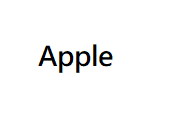

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
import pytesseract as pt #import pytesseract as pt

m1=cv2.imread("9.png",1) #餵一張有文字的圖給他,不要有其他圖案干擾
text=pt.image_to_string(m1,"eng","") #語言包:eng
print("辨識出來的文字：",text)
cv2_imshow(m1)
#想做到中文字的,需要下載中文的訓練資料,參考:[不過我覺得字型可能也有差別]
#https://ithelp.ithome.com.tw/articles/10227263


輪廓數量： 18
辨識出來的問字： “shutterstock.com - 1913844355



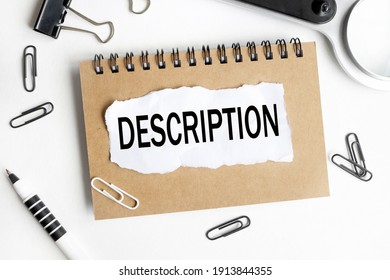

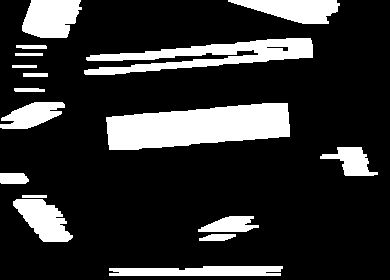

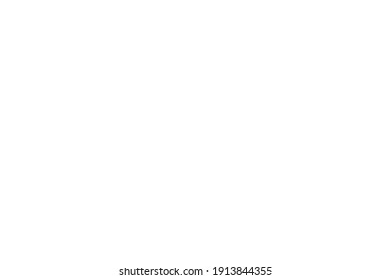

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
import pytesseract as pt

m1=cv2.imread("10.png",1)
m2=cv2.inRange(m1, (0,0,0), (50,50,50))
m2=cv2.dilate(m2,np.ones((3,25)))
a, b=cv2.findContours(m2,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
print("輪廓數量：",len(a))

middle=int(m1.shape[0]/2)
center=int(m1.shape[1]/2)

maxIndex=0
for i in range(1,len(a),1): #從1開始,不能包含0,因為a[0]是最外圈,範圍一定最大,會抓到他
  #取得包覆指定輪廓點的最小正矩形：X座標, Y座標, 寬度, 高度 =cv2.boundingRect(指定的輪廓) 
  x1, y1, w1, h1 =cv2.boundingRect(a[i])
  x2, y2, w2, h2 =cv2.boundingRect(a[maxIndex])
  if w1*h1>w2*h2: #比較輪廓面積大小,知道哪個是最大的(星星),存取他的索引值  
    maxIndex=i

#第二種解法,用絕對值比較哪個矩形的中心離圖片正中心點最近
# minIndex=0 #>>>釐清一下
# for i in range(1,len(a),1):
#   x1, y1, w1, h1 =cv2.boundingRect(a[i])
#   x2, y2, w2, h2 =cv2.boundingRect(a[minIndex])
#   center1=abs(int(x1+(w1/2))-center) #因為x1是矩形最左上角的點座標,所以要加上整個矩形的寬/2 > 就會是矩形的中心點x座標
#   middle1=abs(int(y1+(h1/2))-middle) #同理,拿矩形中心點的y座標
#   center2=abs(int(x2+(w2/2))-center) #拿圖片的正中心x
#   middle2=abs(int(y2+(h2/2))-middle) #拿圖片的正中心y
#   if center1+middle1<center2+middle2:
#     minIndex=i

#如果要截最下面的文字的話
# textIndex=0
# for i in range(1,len(a),1): #從1開始,不能包含0,因為a[0]是最外圈,範圍一定最大,會抓到他
#   #取得包覆指定輪廓點的最小正矩形：X座標, Y座標, 寬度, 高度 =cv2.boundingRect(指定的輪廓) 
#   x1, y1, w1, h1 =cv2.boundingRect(a[i])
#   x2, y2, w2, h2 =cv2.boundingRect(a[textIndex])
#   if w1-h1*3>w2-h2*3: #比較輪廓面積大小,知道哪個是最大的(星星),存取他的索引值  #原本用絕對值比較,結果
#     textIndex=i



m3=np.full(m1.shape,(255,255,255),np.uint8)
cv2.drawContours(m3,a,minIndex,(0,0,0),-1)
m3=cv2.add(m1,m3)

text=pt.image_to_string(m3,"eng","")
print("辨識出來的問字：",text)
cv2_imshow(m1)
cv2_imshow(m2)
cv2_imshow(m3)


In [36]:
!python training.py #執行老師提供的訓練字型程式
#建一個my的語言包 ,並餵一個圖片my1.png給他>>>要注意餵給他的文字圖檔像素要介於16-20之間,他才讀得到 #就會生成一個box,如果box裡面如果是空的代表訓練失敗
#Box裡面可以修改相對的文字讓程式去辨識,ex:1>A , 2>B , 3>C
#語言包要丟的路徑:/usr/share/tesseract-ocr/4.00/tessdata >>> 完成後你可以在這個路徑看到你建立的語言包"my.traineddata"

請輸入這個新語言包的名稱：my
請輸入要學習的圖檔名稱：my1.png
Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Estimating resolution as 503
請先確認my.box檔案內容是否正確在按Enter鍵
Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Estimating resolution as 503
APPLY_BOXES:
   Boxes read from boxfile:       3
   Found 3 good blobs.
Generated training data for 1 words
Extracting unicharset from box file my.box
Wrote unicharset file unicharset
Reading my.tr ...
Building master shape table
Computing shape distances...
Stopped with 0 merged, min dist 999.000000
Computing shape distances...
Stopped with 0 merged, min dist 999.000000
Computing shape distances...
Stopped with 0 merged, min dist 999.000000
Computing shape distances... 0
Stopped with 0 merged, min dist 999.000000
Computing shape distances... 0
Stopped with 0 merged, min dist 999.000000
Computing shape distances...
Stopped with 0 merged, min

辨識出來的文字： 122



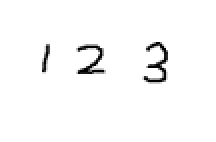

In [37]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
import pytesseract as pt

m1=cv2.imread("my1.png",1) #讀圖檔
text=pt.image_to_string(m1,"my","") #用語言包去讀這個圖檔
print("辨識出來的文字：",text)
cv2_imshow(m1)


In [ ]:
#偵測條碼可以使用zbar函式庫，該函式庫支援多種條碼的辨識，包含QR Code和Code 39等(COLAB)：
!apt install libzbar-dev
#安裝對應的Python模組：
!pip install pyzbar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gir1.2-freedesktop
  gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 gsfonts imagemagick-6-common
  libcairo-script-interpreter2 libcairo2-dev libcupsfilters1 libcupsimage2
  libdjvulibre-dev libdjvulibre-text libdjvulibre21 libgdk-pixbuf2.0-dev
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 liblcms2-dev liblqr-1-0
  liblqr-1-0-dev libmagick++-6-headers libmagick++-6.q16-7
  libmagick++-6.q16-dev libmagick++-dev libmagickcore-6-arch-config
  libmagickcore-6-headers libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickcore-6.q16-dev libmagickwand-6-headers libmagickwand-6.q16-3
  libmagickwand-6.q16-dev libpixman-1-dev librsvg2-dev libv4l-0 libv4lconvert0
  libwmf-dev libwmf0.2-7 libxcb-shm0-dev libzbar0 poppler-data
Suggested packages:
  fonts-noto ghostscript-x libcairo2-doc inkscape libjxr

條碼類型： QRCODE
條碼內容： https://www.cool3c.com/
條碼類型： QRCODE
條碼內容： https://ntbna.etax.nat.gov.tw/etwmain/front/ETW600W/WebMail/PM
條碼類型： QRCODE
條碼內容： <a href="https://github.com/wpdo/doqrcode">https://github.com/wpdo/doqrcode</a>
條碼類型： QRCODE
條碼內容： http://www.ccps.tc.edu.tw
條碼類型： QRCODE
條碼內容： http://zh.wikipedia.org/
條碼類型： QRCODE
條碼內容： http://heavenbird.many30.com
條碼類型： QRCODE
條碼內容： https://www.facebook.com/3Bro.Studio


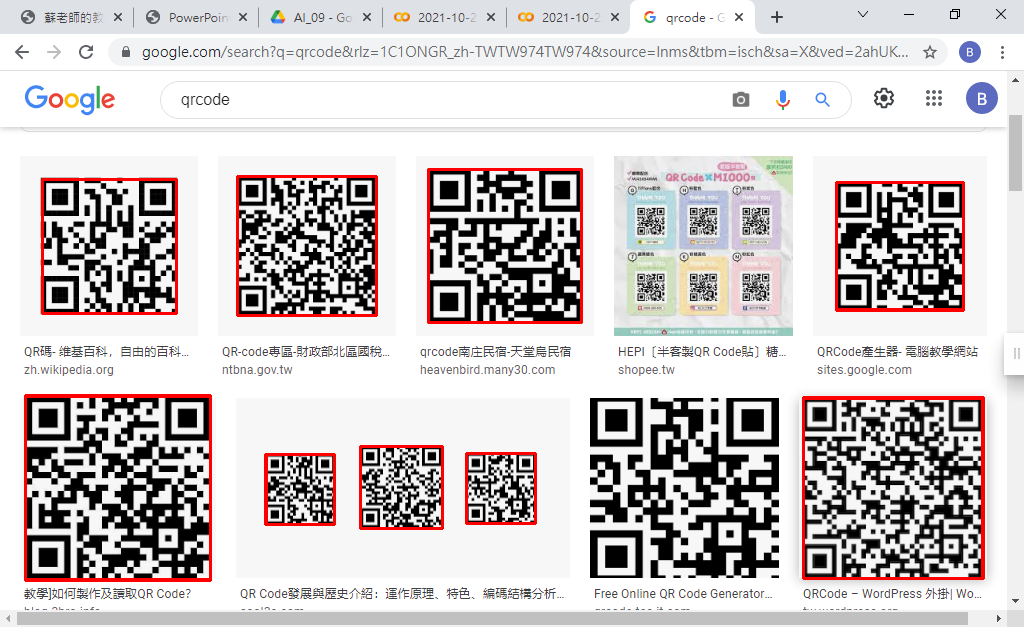

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
from pyzbar import pyzbar #載入需要的模組

m1=cv2.imread("code_scan.png",1)
ret=pyzbar.decode(m1) #結果變數=pyzbar.decode(圖像變數) ， 結果會是串列(list)類型，每個索引值指向一個條碼

for d in ret: #用for迴圈來把這個圖片上辨識到的每個結果印出來
  print("條碼類型：",d.type) #code的型態
  print("條碼內容：",d.data.decode("utf-8")) #內容d.data是二進位制,所以要用decodee編碼成utf8
  #如果要顯示UTF-8的中文必須：decode成UTF-8後再encode成sjis，最後再decode成UTF-8 
  x,y,w,h=d.rect #可以標出辨識到的矩陣
  cv2.rectangle(m1, (x,y), (x+w,y+h), (0,0,255), 2) #把辨識到的矩陣畫出來
  print("=============")
cv2_imshow(m1) 

條碼類型： QRCODE
條碼內容： 哈囉


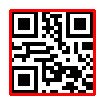

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
from pyzbar import pyzbar

m1=cv2.imread("11.png",1) #餵一個中文的QRcode png
ret=pyzbar.decode(m1)
for d in ret:
  print("條碼類型：",d.type)
  #中文QRcode的解碼方法,因為有的中文不會出亂碼所以要用try except,如果try失敗,就會用回原本的編碼方式
  try:
    print("條碼內容：",d.data.decode("utf-8").encode("sjis").decode("utf-8"))  #編碼utf-8 > 轉碼日文 > 編碼回utf-8
  except:
    print("條碼內容：",d.data.decode("utf-8")) #如果try失敗,退回來用原本的編碼方式,可以解決上面解碼失敗的狀況
  x,y,w,h=d.rect
  cv2.rectangle(m1, (x,y), (x+w,y+h), (0,0,255), 2)
  print("=============")
cv2_imshow(m1)

In [ ]:
!unzip haarcascades.zip #從openCV那邊拿到這個分類器文件,他裡面已經寫好一些特徵分辨的算法,這裡要用的是face的算法來辨識大合照中的人臉

Archive:  haarcascades.zip
   creating: haarcascades/
  inflating: haarcascades/haarcascade_eye.xml  
  inflating: haarcascades/haarcascade_eye_tree_eyeglasses.xml  
  inflating: haarcascades/haarcascade_frontalcatface.xml  
  inflating: haarcascades/haarcascade_frontalcatface_extended.xml  
  inflating: haarcascades/haarcascade_frontalface_alt.xml  
  inflating: haarcascades/haarcascade_frontalface_alt2.xml  
  inflating: haarcascades/haarcascade_frontalface_alt_tree.xml  
  inflating: haarcascades/haarcascade_frontalface_default.xml  
  inflating: haarcascades/haarcascade_fullbody.xml  
  inflating: haarcascades/haarcascade_lefteye_2splits.xml  
  inflating: haarcascades/haarcascade_licence_plate_rus_16stages.xml  
  inflating: haarcascades/haarcascade_lowerbody.xml  
  inflating: haarcascades/haarcascade_profileface.xml  
  inflating: haarcascades/haarcascade_righteye_2splits.xml  
  inflating: haarcascades/haarcascade_russian_plate_number.xml  
  inflating: haarcascades/haarcascade

(array([0, 0, 0, 0]), array([0, 1, 2, 3])) 253 64 154 154
(array([1, 1, 1, 1]), array([0, 1, 2, 3])) 418 38 205 205
(array([ 2,  2,  2,  2, 10, 10]), array([0, 1, 2, 3, 2, 3])) 449 116 53 53
(array([ 3,  3,  3,  3, 20, 20]), array([0, 1, 2, 3, 2, 3])) 269 123 52 52
(array([4, 4, 4, 4]), array([0, 1, 2, 3])) 338 118 49 49
(array([5, 5, 5, 5, 8, 8]), array([0, 1, 2, 3, 2, 3])) 188 106 54 54
(array([6, 6, 6, 6]), array([0, 1, 2, 3])) 394 159 43 43
(array([7, 7, 7, 7, 8]), array([0, 1, 2, 3, 1])) 360 179 46 46
(array([5, 5, 7, 8, 8, 8, 8]), array([2, 3, 1, 0, 1, 2, 3])) 155 179 54 54
(array([9, 9, 9, 9]), array([0, 1, 2, 3])) 228 185 55 55
(array([ 2,  2, 10, 10, 10, 10]), array([2, 3, 0, 1, 2, 3])) 671 147 53 53
(array([11, 11, 11, 11]), array([0, 1, 2, 3])) 78 175 67 67
(array([12, 12, 12, 12]), array([0, 1, 2, 3])) 573 165 70 70
(array([13, 13, 13, 13, 16, 16, 22, 22]), array([0, 1, 2, 3, 2, 3, 2, 3])) 472 195 62 62
(array([14, 14, 14, 14]), array([0, 1, 2, 3])) 112 251 87 87
(array([15

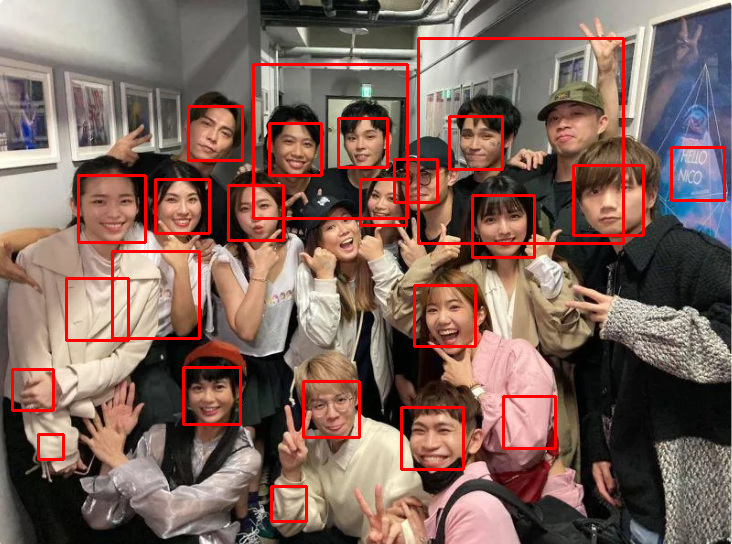

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("12.png",1)#放一個大合照的圖
p1=cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_default.xml") #控制變數=cv2.CascadeClassifier(分類器文件) >>> 這裡指到辨識人臉功能的分類器
#辨識目標：結果變數=控制變數.detectMultiScale(圖像變數,minNeighbors=檢測門檻數,minSize=最小尺寸) , 檢測門檻(整數值)越大越嚴格>搜到的越少,越小則越多 , 最小尺寸(寬, 高)是辨識目標大小的最小尺寸>視圖片中目標的大小來調整
ret=p1.detectMultiScale(m1,minNeighbors=1,minSize=(20,20))
#結果變數會是個二維矩陣： 第一維：每一個辨識到的目標 第二維：每一個目標的X座標、Y座標、寬和高
# print(ret)
for x,y,w,h in ret:
  print(np.where(ret == [x,y,w,h]),x,y,w,h) #np.where(ret == [x,y,w,h]) 印索引:標出x,y,w,h的索引值
for x,y,w,h in ret:
  cv2.rectangle(m1, (x,y), (x+w,y+h), (0,0,255), 2) #這裡是把辨識目標逐一用紅色的框飆起來

cv2_imshow(m1)

In [ ]:
!unzip classifier_training_colab.zip #把老師建好的模組解壓縮
!python ./classifier_training_colab/training.py #並運行裡面的training.py , 會自動對負樣本(NEG)、正樣本(POS)進行訓練,並產出檔案 
#正樣本大小要是50*50(老師設定的框架)
#其中樣本文件 POS.txt > POS/00004.png 1 0 0 50 50 >> (檔名,圖片內的樣本數,x,y,w,h)
#xml - cascade是特徵文件
#做新訓練的話要把xml清空

Archive:  classifier_training_colab.zip
   creating: classifier_training_colab/
   creating: classifier_training_colab/Data/
  inflating: classifier_training_colab/Data/Image.jpg  
   creating: classifier_training_colab/NEG/
 extracting: classifier_training_colab/NEG/00000.png  
  inflating: classifier_training_colab/NEG/00001.png  
  inflating: classifier_training_colab/NEG/00002.png  
  inflating: classifier_training_colab/NEG/00003.png  
  inflating: classifier_training_colab/NEG/00004.png  
  inflating: classifier_training_colab/NEG/00005.png  
  inflating: classifier_training_colab/NEG/00006.png  
  inflating: classifier_training_colab/NEG/00007.png  
  inflating: classifier_training_colab/NEG/00008.png  
 extracting: classifier_training_colab/NEG/00009.png  
  inflating: classifier_training_colab/NEG/00010.png  
  inflating: classifier_training_colab/NEG/00011.png  
  inflating: classifier_training_colab/NEG/00012.png  
  inflating: classifier_training_colab/NEG/00013.png  
  inf

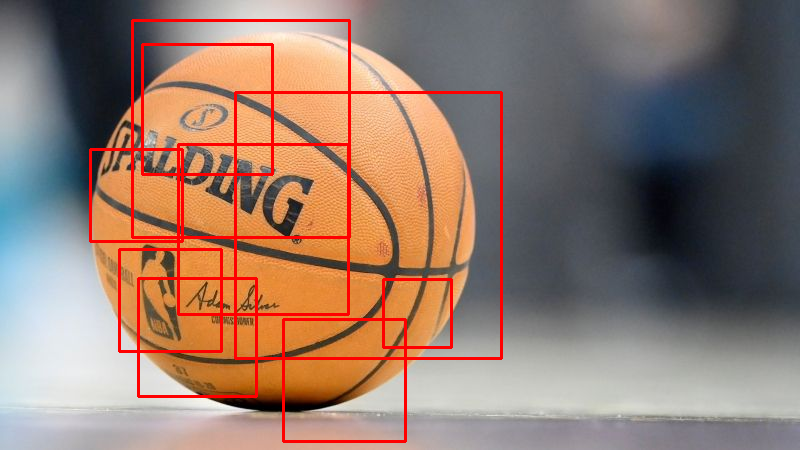

In [39]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("classifier_training_colab/Data/Image.jpg",1) #Data裡面放的是要被辨識的目標,先讀取
p1=cv2.CascadeClassifier("classifier_training_colab/xml/cascade.xml") #分類器：控制變數=cv2.CascadeClassifier(分類器文件)
ret=p1.detectMultiScale(m1,minNeighbors=1,minSize=(50,50)) #辨識目標：結果變數=控制變數.detectMultiScale(圖像變數,minNeighbors=檢測門檻數,minSize=最小尺寸)

for x,y,w,h in ret: #用for把每個標示物標記起來
  cv2.rectangle(m1, (x,y), (x+w,y+h), (0,0,255), 2)

cv2_imshow(m1)